# Datos Faltantes

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [3]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
323,0.070769,0.050680,-0.007284,0.049415,0.060349,-0.004445,-0.054446,0.108111,0.129021,0.056912,248.0
342,0.056239,0.050680,0.021817,0.056301,-0.007073,0.018101,-0.032356,-0.002592,-0.023647,0.023775,178.0
131,-0.096328,-0.044642,-0.069797,-0.067642,-0.019456,-0.010708,0.015505,-0.039493,-0.046883,-0.079778,158.0
155,-0.027310,0.050680,0.060618,0.049415,0.085116,0.086368,-0.002903,0.034309,0.037811,0.048628,186.0
54,-0.049105,-0.044642,0.025051,0.008101,0.020446,0.017788,0.052322,-0.039493,-0.041176,0.007207,182.0
390,0.009016,0.050680,0.069241,0.059744,0.017694,-0.023234,-0.047082,0.034309,0.103297,0.073480,277.0
363,-0.049105,0.050680,-0.024529,0.000079,-0.046975,-0.028245,-0.065491,0.028405,0.019196,0.011349,58.0
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
176,0.045341,0.050680,0.019662,0.039087,0.020446,0.025930,0.008142,-0.002592,-0.003301,0.019633,237.0
41,-0.099961,-0.044642,-0.067641,-0.108956,-0.074494,-0.072712,0.015505,-0.039493,-0.049872,-0.009362,55.0


In [4]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

los datos faltantes en son 44 en las columnas BMI y BP

In [5]:
data.isnull().sum()

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [14]:
imputer = SimpleImputer(strategy='mean')
data[['bmi']] = imputer.fit_transform(data[['bmi']])

### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [17]:
#copia del data set original
data_knn = data.copy()
#crear imputador
knn_imputer = KNNImputer(n_neighbors=5)
#aplicar imputacion solo en bmi y bp
data_knn[['bkmi', 'bp']] = knn_imputer.fit_transform(data_knn[['bmi', 'bp']])
#comparar valores
print("imputacion simple - promedio BMI", round(data['bmi'].mean(), 3))
print("imputacion KNN - promedio BMI", round(data_knn['bmi'].mean(), 3))

imputacion simple - promedio BMI -0.0
imputacion KNN - promedio BMI -0.0


### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

<function matplotlib.pyplot.show(close=None, block=None)>

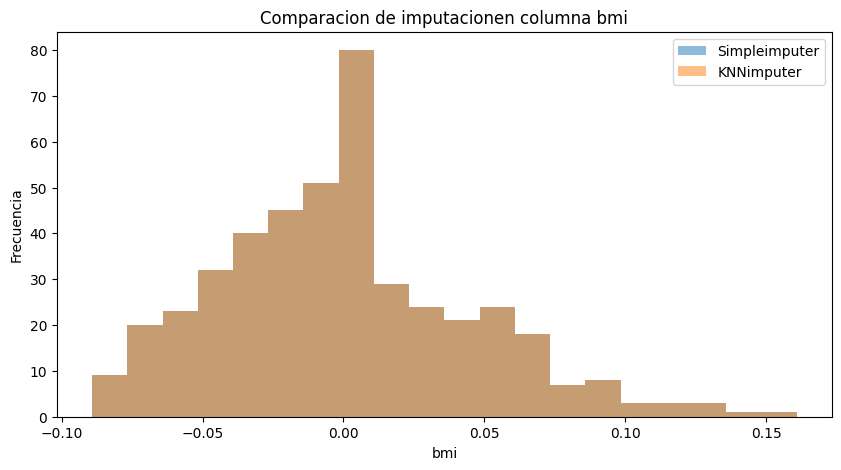

In [19]:
plt.figure(figsize=(10,5))
plt.hist(data['bmi'], bins=20, alpha=0.5, label='Simpleimputer')
plt.hist(data_knn['bmi'], bins=20, alpha=0.5, label='KNNimputer')
plt.title('Comparacion de imputacionen columna bmi')
plt.xlabel('bmi')
plt.ylabel('Frecuencia')
plt.legend()
plt.show